In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-25 15:40:42.845778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

Acute lymphoblastic leukemia (ALL) is the most common type of childhood cancer and accounts for approximately 25% of the pediatric cancers.

Here is the dataset with microscopre images of blood cells: some of them are immature leukemic cells and other are normal cells. 
    
It is challenging to identify which cells are leukemic and which are normal from microscopre imgage and it is important to do so in order to diagnose as early as possible. 

This is binary classification task: class 1 is normal cell and class2 is leukemia blast.
    
Data citation: Data Citation
Gupta, A., & Gupta, R. (2019). ALL Challenge dataset of ISBI 2019 [Data set]. 
The Cancer Imaging Archive. https://doi.org/10.7937/tcia.2019.dc64i46r

Dataset was taken from https://www.kaggle.com/datasets/andrewmvd/leukemia-classification/data 

Currently, I'm using my local laptop for building models which does not have plenty GPUs for training, therefore I have to opt for simpler models with less accuracy (and less amount of data) 

# Initial Data Preparation, binary classification

Since it's a picture classification problem, then Convolutional NN would work here nicely 

In [3]:
!ls archive/C-NMC_Leukemia

testing_data  training_data  validation_data


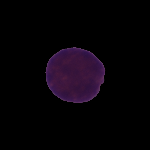

In [23]:
path = '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'
name = '1000.bmp'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(150, 150))
img

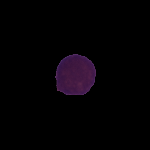

In [24]:
path = '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'
name = '1005.bmp'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(150, 150))
img

In [25]:
x = np.array(img)
x.shape

(150, 150, 3)

# Model 1: simple convolutional neural network

### model creation 

In [9]:
#create model
model = Sequential()

#add model layers
# 32 filters
# kernel size (3,3)
# relu activation
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,3)))

# pooling: MaxPooling2D 
#Set the pooling size to (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Turn the multi-dimensional result into vectors using a Flatten layer
model.add(Flatten())

# Next, add a Dense layer with 64 neurons and 'relu' activation 
model.add(Dense(64, activation='relu'))

# Finally, create the Dense layer with 1 neuron - this will be the output 
model.add(Dense(1, activation='sigmoid'))

# As optimizer use SGD with the following parameters:
# 
opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

2023-11-25 15:43:54.429066: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### data generation

we will use fold_0 for training, fold_1 for testing and fold_2 for validation (they are conviniently put into correct directory structure)

We won't use any data augmentation in this round 

As a preprocessing we will have noralisation by dividing values to 255

In [46]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/training_data/fold_0/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 3527 images belonging to 2 classes.


In [47]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/training_data/fold_1/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 3581 images belonging to 2 classes.


### Training

In [48]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
  1/177 [..............................] - ETA: 22s - loss: 0.5241 - accuracy: 0.8000

2023-11-25 16:41:57.762891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 28s 160ms/step - loss: 0.4258 - accuracy: 0.8225 - val_loss: 0.5275 - val_accuracy: 0.7580
Epoch 2/10
177/177 [==============================] - 30s 168ms/step - loss: 0.4223 - accuracy: 0.8205 - val_loss: 0.5122 - val_accuracy: 0.7588
Epoch 3/10
177/177 [==============================] - 29s 166ms/step - loss: 0.4196 - accuracy: 0.8273 - val_loss: 0.5161 - val_accuracy: 0.7599
Epoch 4/10
177/177 [==============================] - 30s 167ms/step - loss: 0.4183 - accuracy: 0.8208 - val_loss: 0.5216 - val_accuracy: 0.7574
Epoch 5/10
177/177 [==============================] - 30s 170ms/step - loss: 0.4158 - accuracy: 0.8242 - val_loss: 0.5425 - val_accuracy: 0.7588
Epoch 6/10
177/177 [==============================] - 30s 169ms/step - loss: 0.4137 - accuracy: 0.8236 - val_loss: 0.5101 - val_accuracy: 0.7563
Epoch 7/10
177/177 [==============================] - 30s 171ms/step - loss: 0.4115 - accuracy: 0.8248 - val_loss: 0.5243 - val_accuracy: 0.7

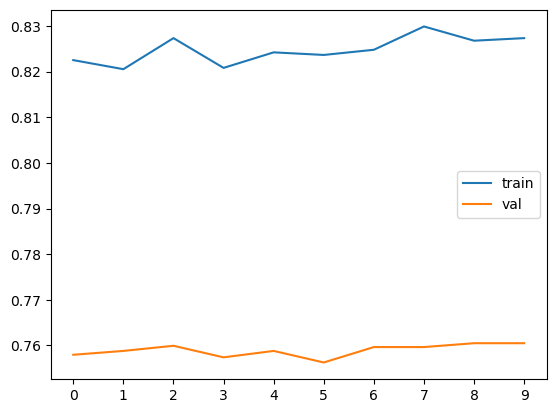

In [51]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

So it looks like that val accuracy stays at ~0.75-0.76 across epochs while train accuracy is at 0.82-0.83. 
We will try to adjust some parameters to see whether they can make a difference 

# Model1: adjusting learning rate 

In [52]:
def create_CNN_model(learning_rate = 0.001):
    #create model
    model = Sequential()

    #add model layers
    # 32 filters
    # kernel size (3,3)
    # relu activation
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,3)))

    # pooling: MaxPooling2D 
    #Set the pooling size to (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Turn the multi-dimensional result into vectors using a Flatten layer
    model.add(Flatten())

    # Next, add a Dense layer with 64 neurons and 'relu' activation 
    model.add(Dense(64, activation='relu'))

    # Finally, create the Dense layer with 1 neuron - this will be the output 
    model.add(Dense(1, activation='sigmoid'))

    # As optimizer use SGD with the following parameters:
    # 
    opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    
    return model

In [53]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = create_CNN_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10


2023-11-25 16:57:33.893705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - ETA: 0s - loss: 0.5871 - accuracy: 0.6694

2023-11-25 16:57:53.669621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 28s 156ms/step - loss: 0.5871 - accuracy: 0.6694 - val_loss: 0.5270 - val_accuracy: 0.6752
Epoch 2/10
177/177 [==============================] - 30s 170ms/step - loss: 0.5232 - accuracy: 0.7153 - val_loss: 0.4803 - val_accuracy: 0.7861
Epoch 3/10
177/177 [==============================] - 30s 169ms/step - loss: 0.4913 - accuracy: 0.7908 - val_loss: 0.4511 - val_accuracy: 0.8185
Epoch 4/10
177/177 [==============================] - 29s 165ms/step - loss: 0.4710 - accuracy: 0.8143 - val_loss: 0.4333 - val_accuracy: 0.8274
Epoch 5/10
177/177 [==============================] - 29s 165ms/step - loss: 0.4581 - accuracy: 0.8205 - val_loss: 0.4210 - val_accuracy: 0.8313
Epoch 6/10
177/177 [==============================] - 30s 172ms/step - loss: 0.4500 - accuracy: 0.8214 - val_loss: 0.4147 - val_accuracy: 0.8313
Epoch 7/10
177/177 [==============================] - 30s 169ms/step - loss: 0.4448 - accuracy: 0.8208 - val_loss: 0.4135 - val_accuracy: 0.8

2023-11-25 17:03:05.522366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.7587

2023-11-25 17:03:26.474881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 30s 167ms/step - loss: 0.5136 - accuracy: 0.7587 - val_loss: 0.4337 - val_accuracy: 0.8255
Epoch 2/10
177/177 [==============================] - 29s 163ms/step - loss: 0.4491 - accuracy: 0.8191 - val_loss: 0.4116 - val_accuracy: 0.8319
Epoch 3/10
177/177 [==============================] - 29s 166ms/step - loss: 0.4375 - accuracy: 0.8174 - val_loss: 0.4013 - val_accuracy: 0.8305
Epoch 4/10
177/177 [==============================] - 28s 158ms/step - loss: 0.4319 - accuracy: 0.8208 - val_loss: 0.4222 - val_accuracy: 0.8322
Epoch 5/10
177/177 [==============================] - 29s 165ms/step - loss: 0.4289 - accuracy: 0.8208 - val_loss: 0.3993 - val_accuracy: 0.8294
Epoch 6/10
177/177 [==============================] - 29s 165ms/step - loss: 0.4256 - accuracy: 0.8236 - val_loss: 0.4035 - val_accuracy: 0.8291
Epoch 7/10
177/177 [==============================] - 29s 164ms/step - loss: 0.4251 - accuracy: 0.8248 - val_loss: 0.3979 - val_accuracy: 0.8

2023-11-25 17:08:43.409629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.8064

2023-11-25 17:09:04.470659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 30s 167ms/step - loss: 0.4614 - accuracy: 0.8064 - val_loss: 0.4224 - val_accuracy: 0.8285
Epoch 2/10
177/177 [==============================] - 30s 172ms/step - loss: 0.4397 - accuracy: 0.8202 - val_loss: 0.4151 - val_accuracy: 0.8311
Epoch 3/10
177/177 [==============================] - 31s 176ms/step - loss: 0.4285 - accuracy: 0.8242 - val_loss: 0.4333 - val_accuracy: 0.8224
Epoch 4/10
177/177 [==============================] - 31s 175ms/step - loss: 0.4197 - accuracy: 0.8290 - val_loss: 0.4389 - val_accuracy: 0.8221
Epoch 5/10
177/177 [==============================] - 31s 173ms/step - loss: 0.4121 - accuracy: 0.8310 - val_loss: 0.4966 - val_accuracy: 0.8135
Epoch 6/10
177/177 [==============================] - 30s 171ms/step - loss: 0.3994 - accuracy: 0.8330 - val_loss: 0.4075 - val_accuracy: 0.8389
Epoch 7/10
177/177 [==============================] - 31s 176ms/step - loss: 0.3872 - accuracy: 0.8356 - val_loss: 0.3972 - val_accuracy: 0.8

2023-11-25 17:14:30.914610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.7689

2023-11-25 17:14:54.226608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 32s 182ms/step - loss: 0.5230 - accuracy: 0.7689 - val_loss: 0.4915 - val_accuracy: 0.7612
Epoch 2/10
177/177 [==============================] - 34s 192ms/step - loss: 0.5923 - accuracy: 0.7270 - val_loss: 0.6305 - val_accuracy: 0.6752
Epoch 3/10
177/177 [==============================] - 32s 180ms/step - loss: 0.6281 - accuracy: 0.6773 - val_loss: 0.6306 - val_accuracy: 0.6752
Epoch 4/10
177/177 [==============================] - 32s 179ms/step - loss: 0.6299 - accuracy: 0.6796 - val_loss: 0.6315 - val_accuracy: 0.6752
Epoch 5/10
177/177 [==============================] - 31s 176ms/step - loss: 0.6276 - accuracy: 0.6796 - val_loss: 0.6460 - val_accuracy: 0.6752
Epoch 6/10
177/177 [==============================] - 31s 176ms/step - loss: 0.6241 - accuracy: 0.6836 - val_loss: 0.6343 - val_accuracy: 0.6752
Epoch 7/10
177/177 [==============================] - 32s 182ms/step - loss: 0.6292 - accuracy: 0.6796 - val_loss: 0.6307 - val_accuracy: 0.6

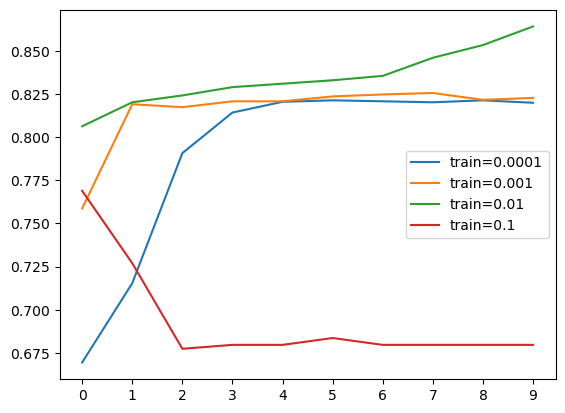

In [56]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('test=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

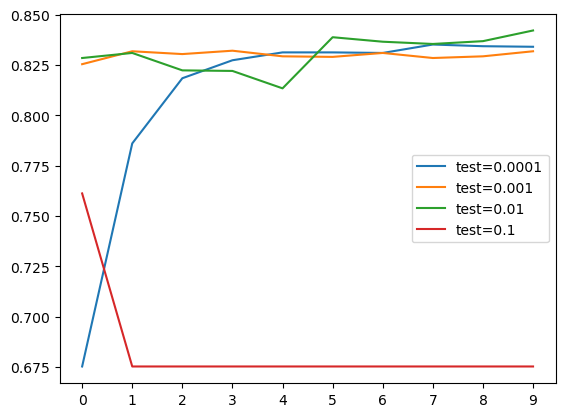

In [57]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('test=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

# Advancing Model1: dropout

Now let's define a dropout layer and the dropout rate 

In [58]:
def create_CNN_model_advanced(learning_rate = 0.01,  droprate=0.5):
    #create model
    model = Sequential()

    #add model layers
    # 32 filters
    # kernel size (3,3)
    # relu activation
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,3)))

    # pooling: MaxPooling2D 
    #Set the pooling size to (2, 2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Turn the multi-dimensional result into vectors using a Flatten layer
    model.add(Flatten())

    # Next, add a Dense layer with 64 neurons and 'relu' activation 
    model.add(Dense(64, activation='relu'))
    
    # Add a dropout layer 
    model.add(Dropout(droprate))

    # Finally, create the Dense layer with 1 neuron - this will be the output 
    model.add(Dense(1, activation='sigmoid'))

    # As optimizer use SGD with the following parameters:
    # 
    opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
learning_rate = 0.01

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = create_CNN_model_advanced(learning_rate = learning_rate,  
                                      droprate=droprate)

    history = model.fit(train_ds, epochs=10, validation_data=test_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/10


2023-11-25 17:25:44.477537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.7998

2023-11-25 17:26:03.601905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


177/177 [==============================] - 27s 153ms/step - loss: 0.4665 - accuracy: 0.7998 - val_loss: 0.5229 - val_accuracy: 0.7577
Epoch 2/10
177/177 [==============================] - 29s 164ms/step - loss: 0.4384 - accuracy: 0.8157 - val_loss: 0.5171 - val_accuracy: 0.7608
Epoch 3/10
177/177 [==============================] - 29s 162ms/step - loss: 0.4261 - accuracy: 0.8217 - val_loss: 0.5520 - val_accuracy: 0.7467
Epoch 4/10
177/177 [==============================] - 32s 179ms/step - loss: 0.4227 - accuracy: 0.8225 - val_loss: 0.5283 - val_accuracy: 0.7557
Epoch 5/10
136/177 [======================>.......] - ETA: 5s - loss: 0.4108 - accuracy: 0.8304

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

# Advancing Model1 further: data augmentation

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_ds = train_gen.flow_from_directory(
    '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/training_data/fold_0_and_1/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=50,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

test_ds = test_gen.flow_from_directory(
    '/home/triasteran/ML/08-nn/data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

In [ ]:
learning_rate = 0.001
droprate = 0.2

model = create_CNN_model_advanced(learning_rate = learning_rate,  
                                  droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# Now we can find the best performing model via checkpointing 

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'cnn_v1_{epoch:02d}_{test_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='test_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001
droprate = 0.2

model = create_CNN_model_advanced(learning_rate = learning_rate,  
                                  droprate=droprate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    callbacks=[chechpoint]
)

# Now we can use the model 

# Let's try other approached for image recognition: 

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    '/home/triasteran/ML/CapStoneProject1/archive/C-NMC_Leukemia/training_data/fold_2/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)